# Credit card data
| Column name | Description |
| --- | --- |
|**CUSTID**:|  Identification of Credit Card holder (Categorical)  
|**BALANCE**:|  Balance amount left in their account to make purchases  
|**BALANCE_FREQUENCY**:|  How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
|**PURCHASES**:|  Amount of purchases made from account  
|**ONEOFF_PURCHASES**:|  Maximum purchase amount done in one-go  
|**INSTALLMENTS_PURCHASES**:|  Amount of purchase done in installment  
|**CASH_ADVANCE**:|  Cash in advance given by the user  
|**PURCHASES_FREQUENCY**:|  How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
|**ONEOFF_PURCHASES_FREQUENCY**:|  How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
|**PURCHASES_INSTALLMENTS_FREQUENCY**:|  How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
|**CASH_ADVANCE_FREQUENCY**:|  How frequently the cash in advance being paid  
|**CASH_ADVANCE_TRX**:|  Number of Transactions made with "Cash in Advanced"  
|**PURCHASES_TRX**:|  Numbe of purchase transactions made  
|**CREDIT_LIMIT**:|  Limit of Credit Card for user  
|**PAYMENTS**:|  Amount of Payment done by user  
|**MINIMUM_PAYMENTS**:|  Minimum amount of payments made by user  
|**PRC_FULL_PAYMENT**:|  Percent of full payment paid by user  
|**TENURE**:|  Tenure of credit card service for user  

## Preparation
### Import libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Import dataset

In [73]:
data_path_por = '../data/CC GENERAL.csv'
df = pd.read_csv(data_path_por)

### Inspect data
#### Preview

In [74]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Columns

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Null values

In [76]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Unique values

In [77]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

#### Summary
The dataset contains 8950 rows and 18 columns. There is 1 null value in column 'CREDIT_LIMIT' and 313 null values in column 'MINIMUM_PAYMENTS'. There are no categorical columns except 'CUST_ID'.

### Descriptive statistics
#### Summary statistics

In [78]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Distribution of variables
##### Histograms

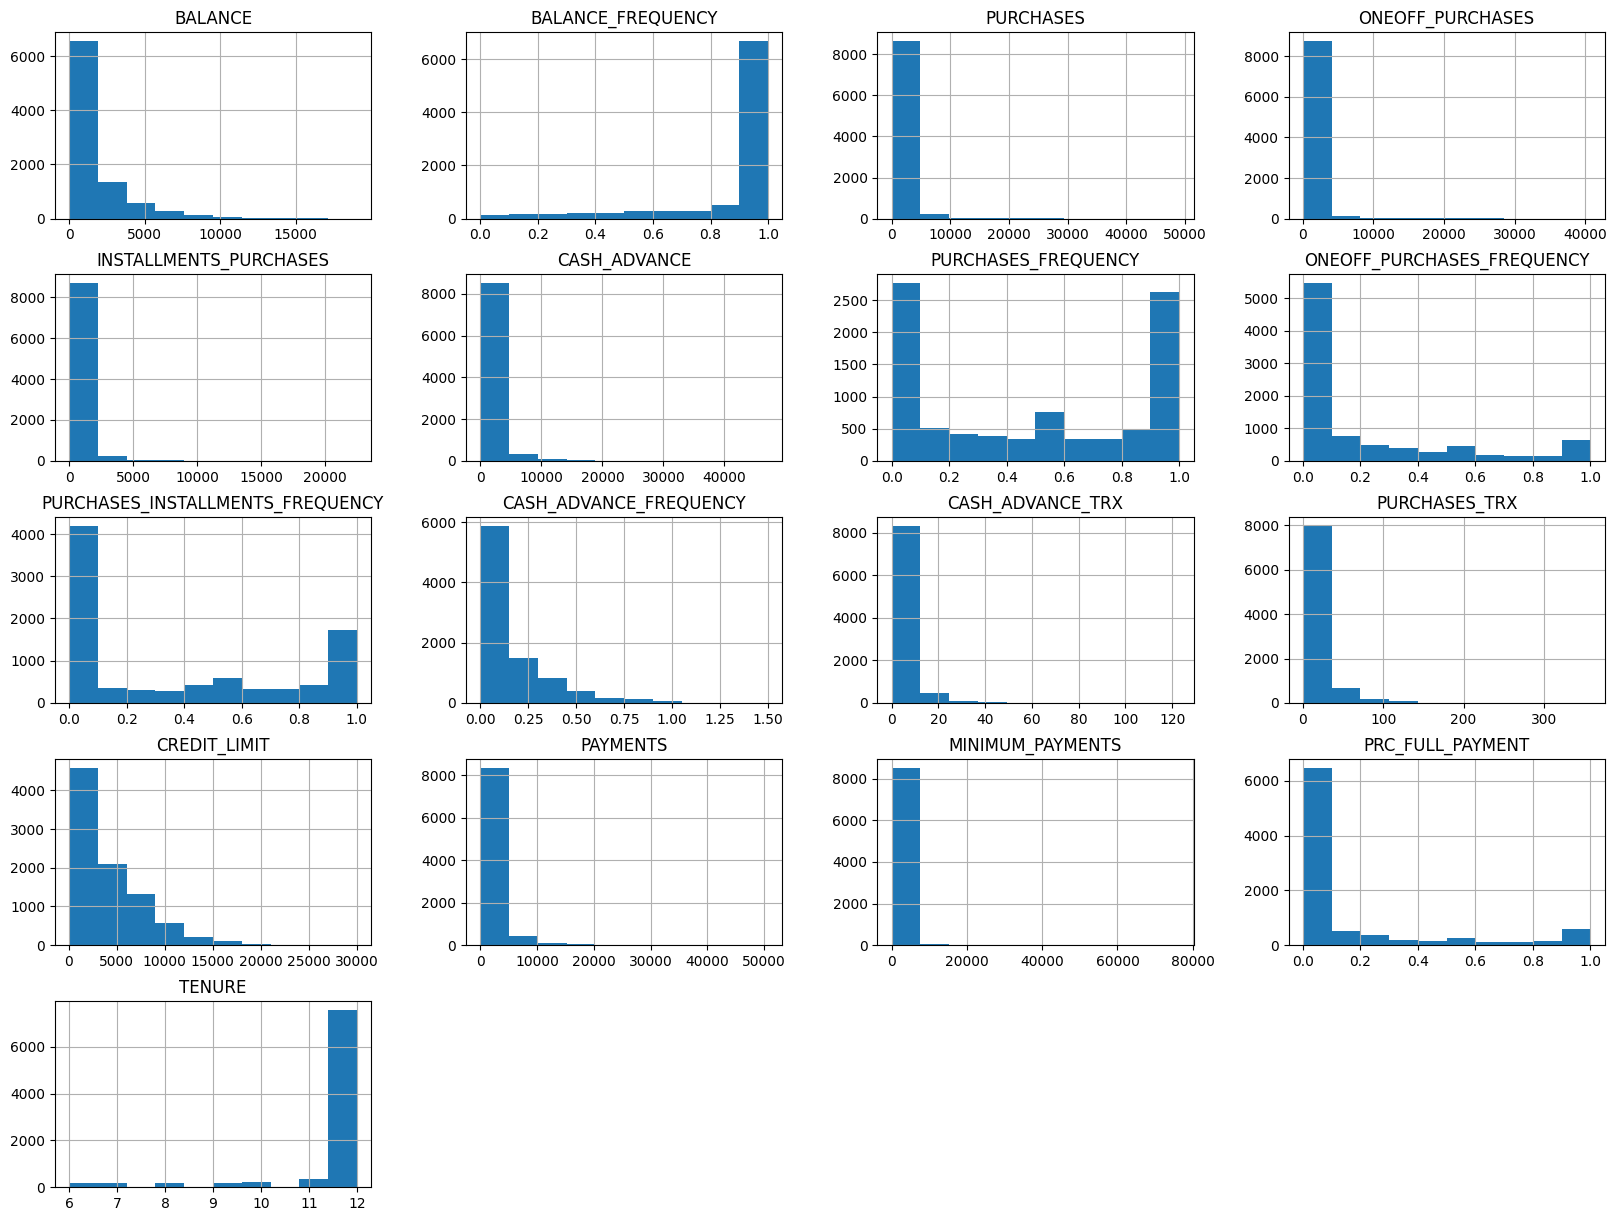

In [79]:
df.hist(figsize=(20, 15))
plt.show()

##### Boxplot

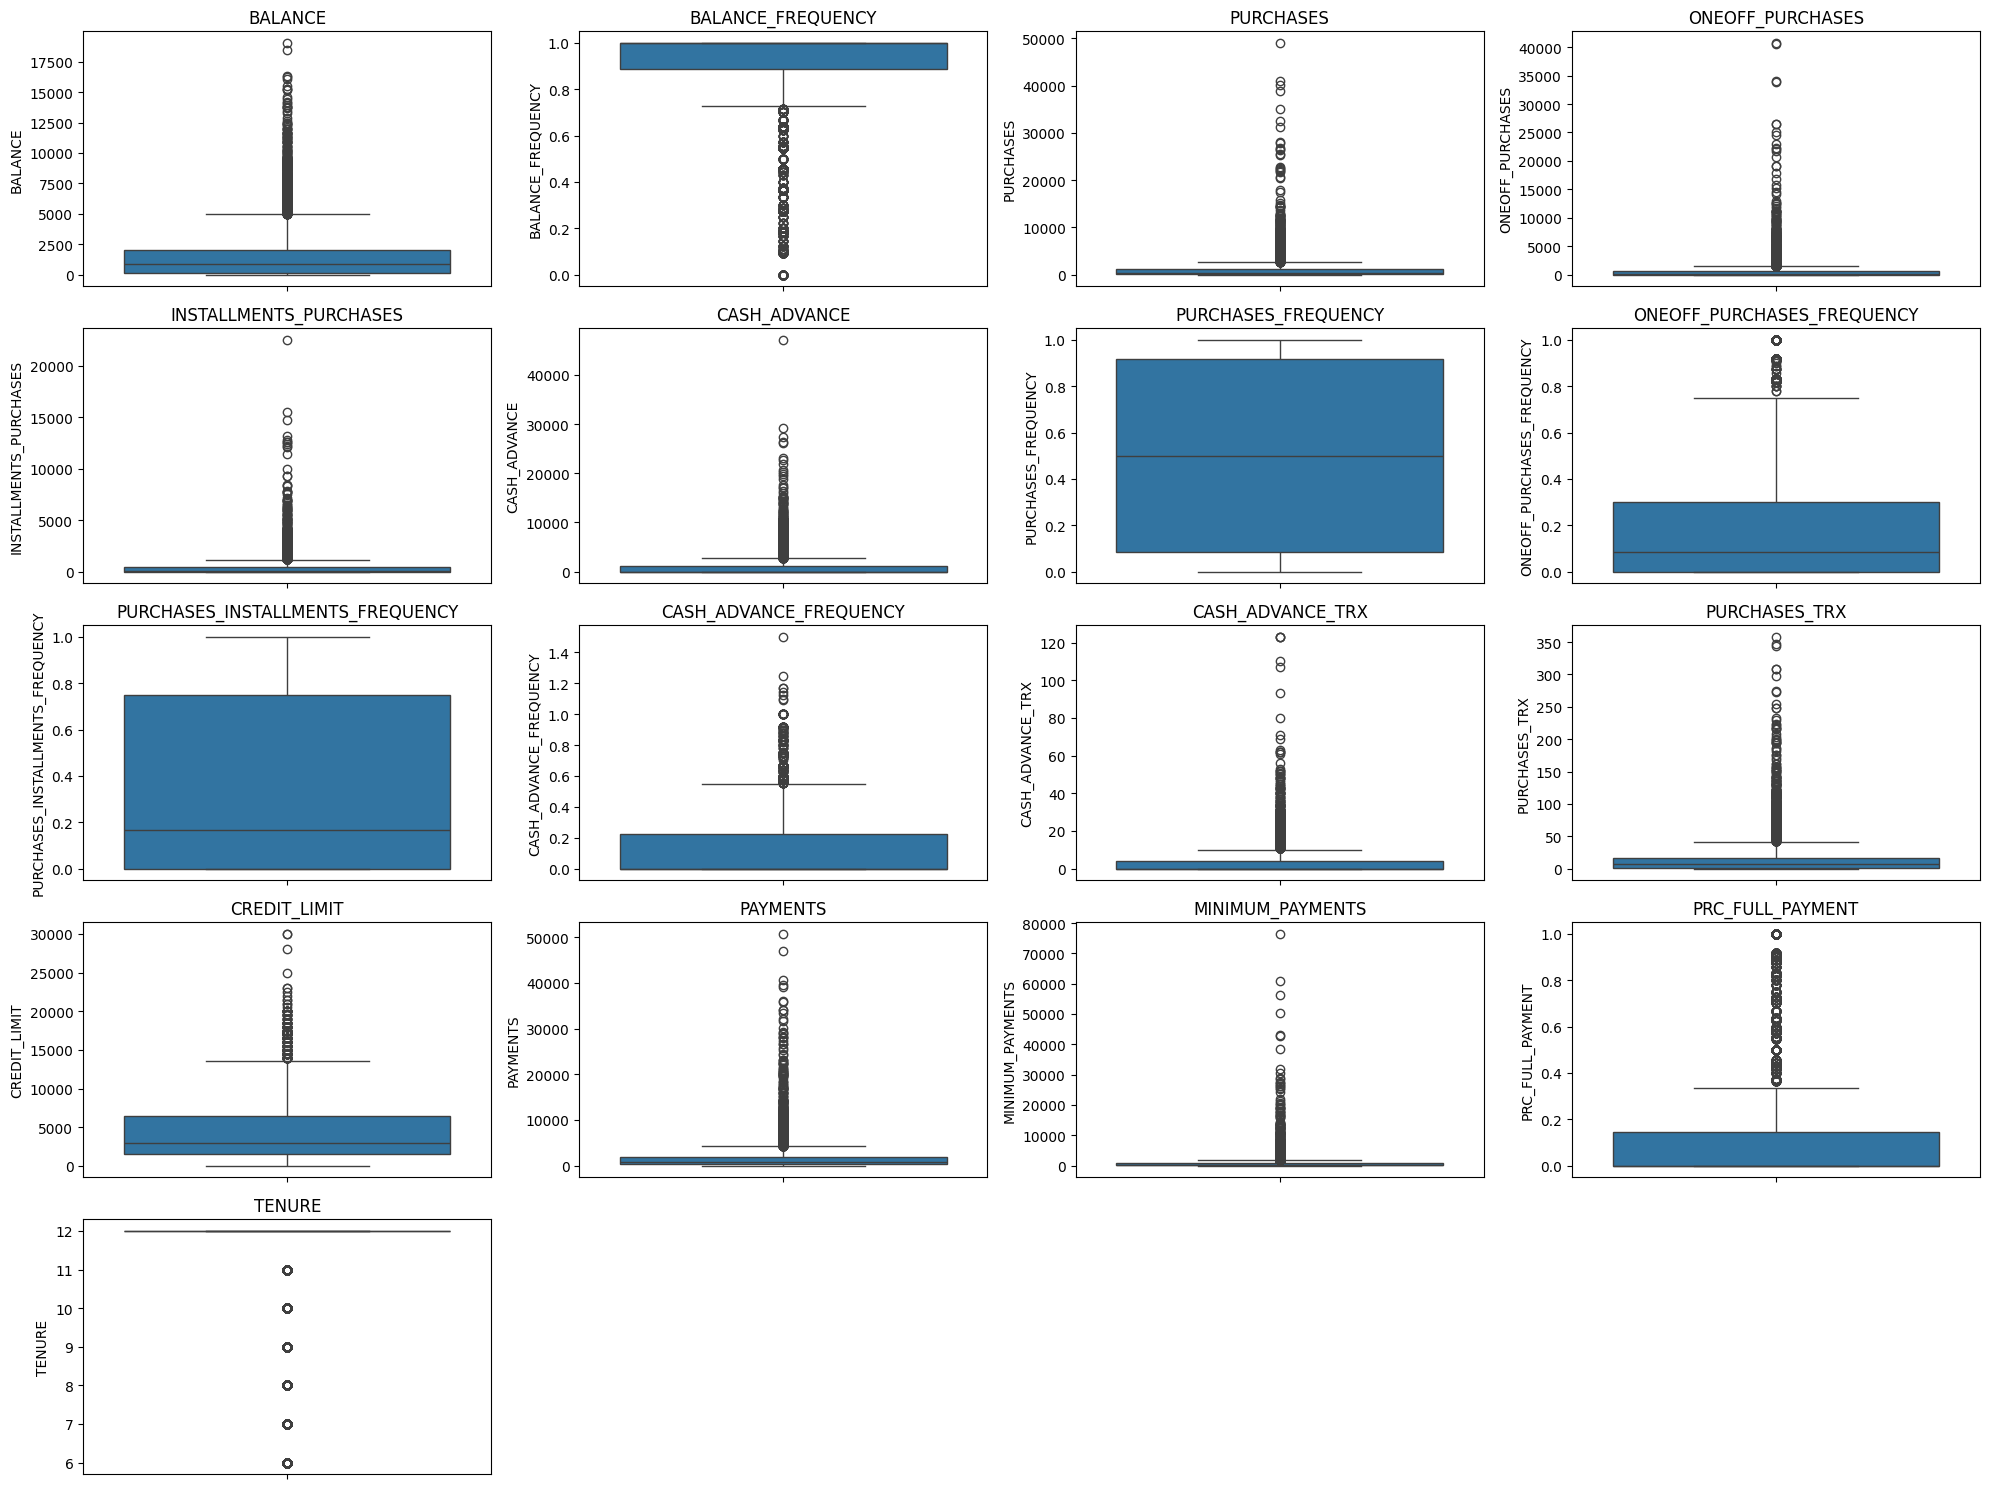

In [80]:
boxplot_cols = df.columns.to_list()
boxplot_cols.remove('CUST_ID')
plt.figure(figsize=(20, 15))
for i, col in enumerate(boxplot_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Correlation matrix

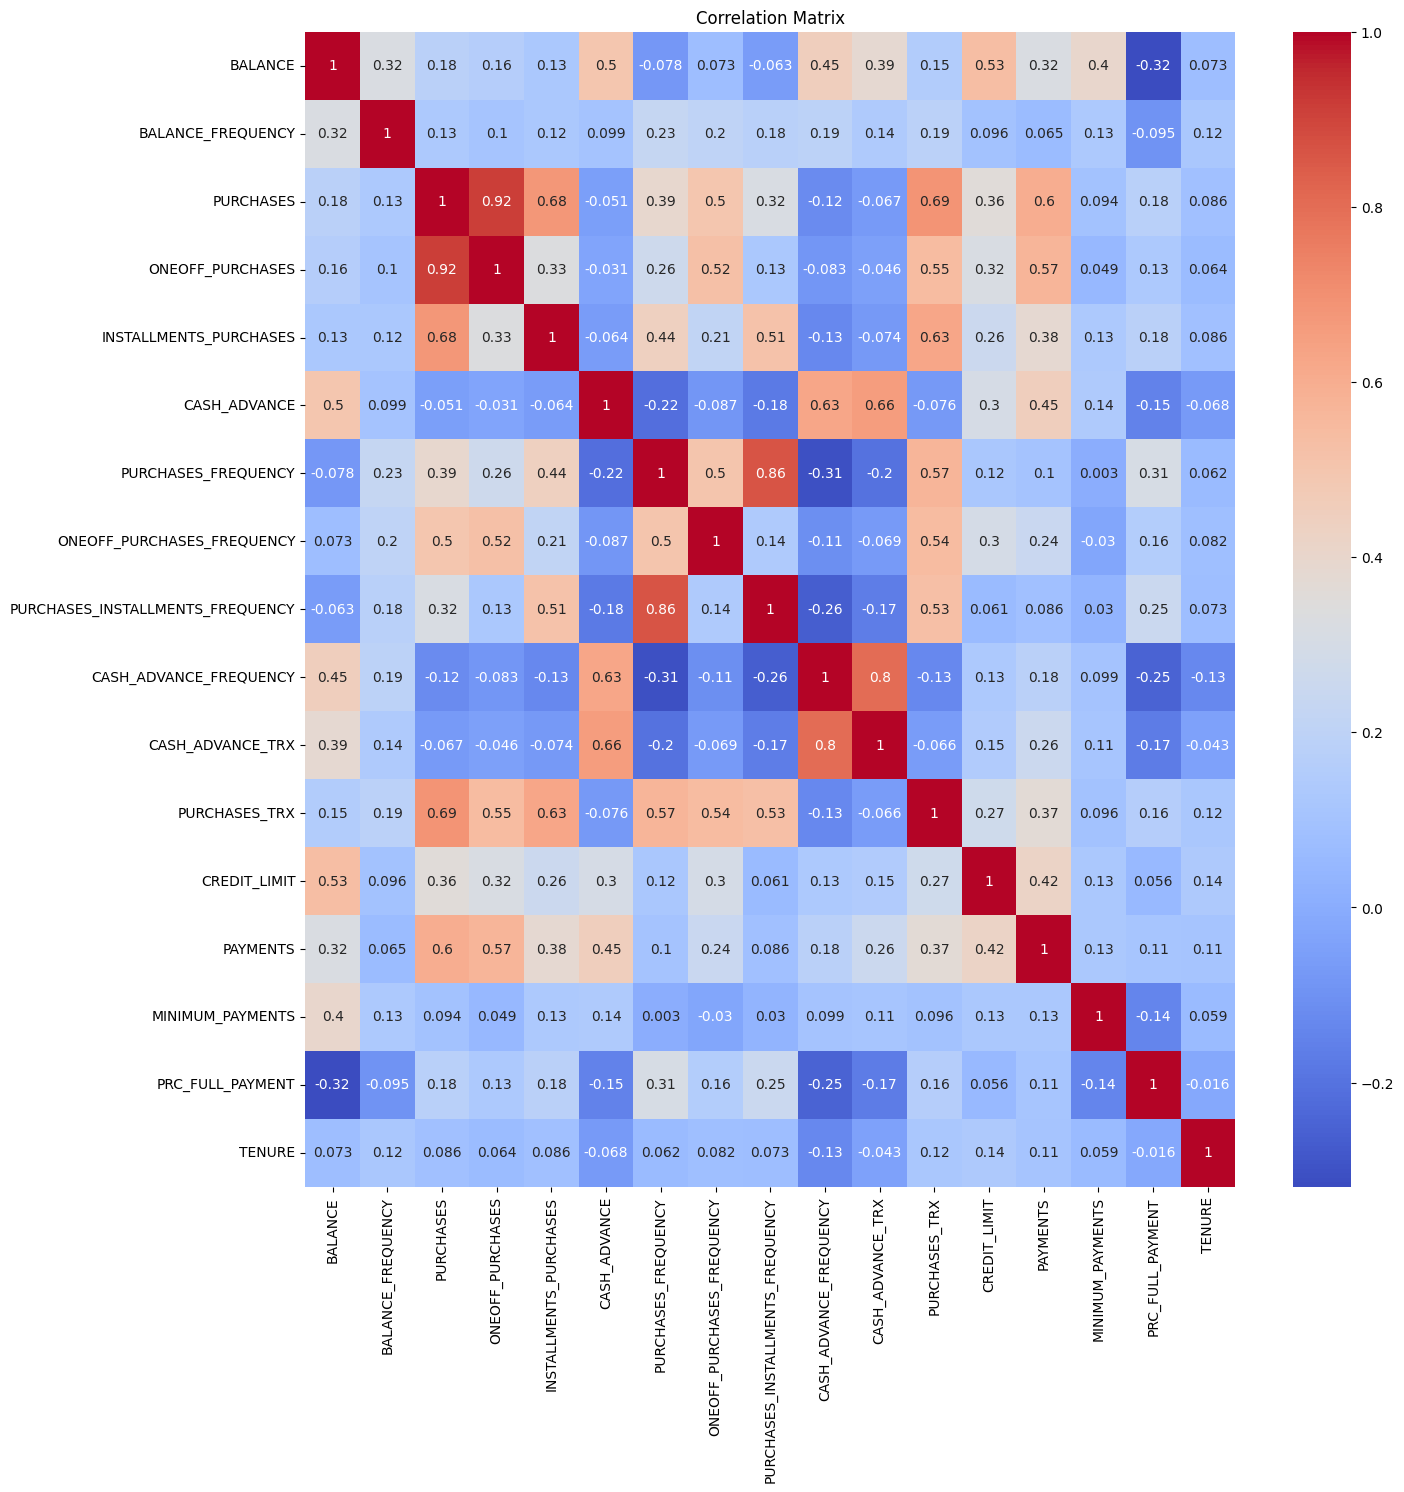

In [81]:
corr = df[df.select_dtypes(exclude=['object']).columns].corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Key relationships
where the correlation is greater than 0.5

In [82]:
key_pairs = set()
for col in corr.columns:
    for row in corr.index:
        if abs(corr.loc[row, col]) > 0.6 and corr.loc[row, col] != 1:
            key_pairs.add(tuple(sorted([row, col])))
key_pairs

{('CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY'),
 ('CASH_ADVANCE', 'CASH_ADVANCE_TRX'),
 ('CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'),
 ('INSTALLMENTS_PURCHASES', 'PURCHASES'),
 ('INSTALLMENTS_PURCHASES', 'PURCHASES_TRX'),
 ('ONEOFF_PURCHASES', 'PURCHASES'),
 ('PAYMENTS', 'PURCHASES'),
 ('PURCHASES', 'PURCHASES_TRX'),
 ('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY')}

#### Scatter plot between key relationships

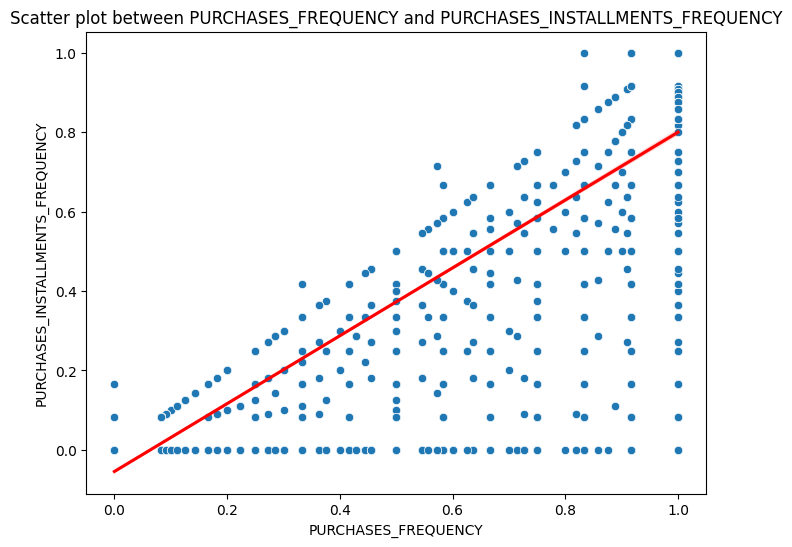

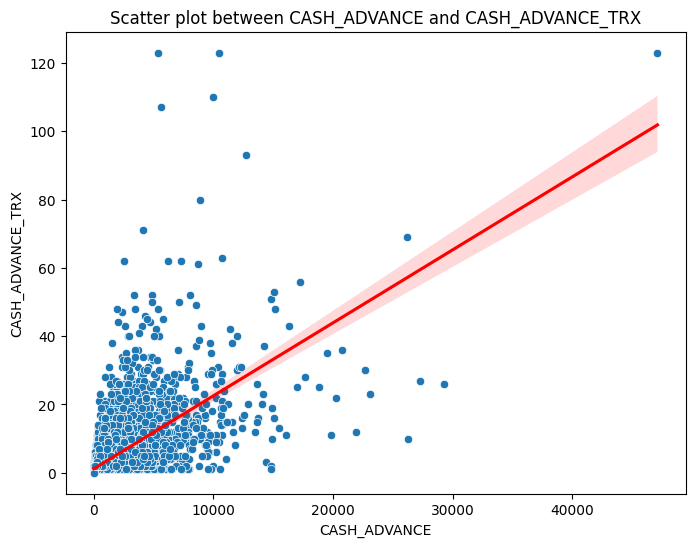

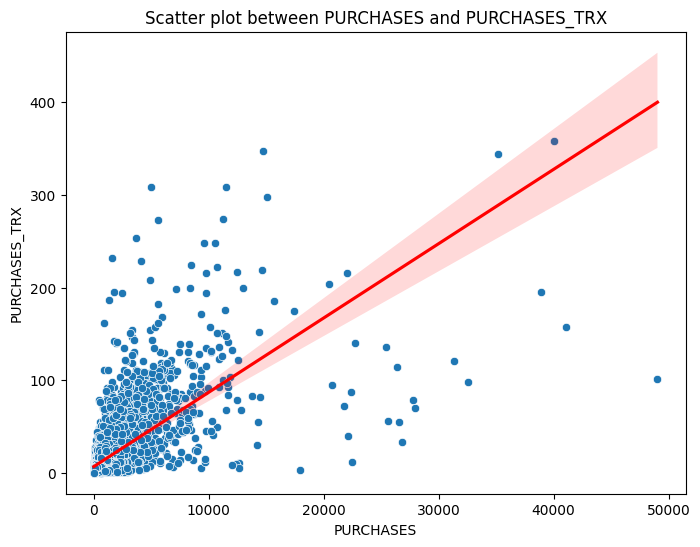

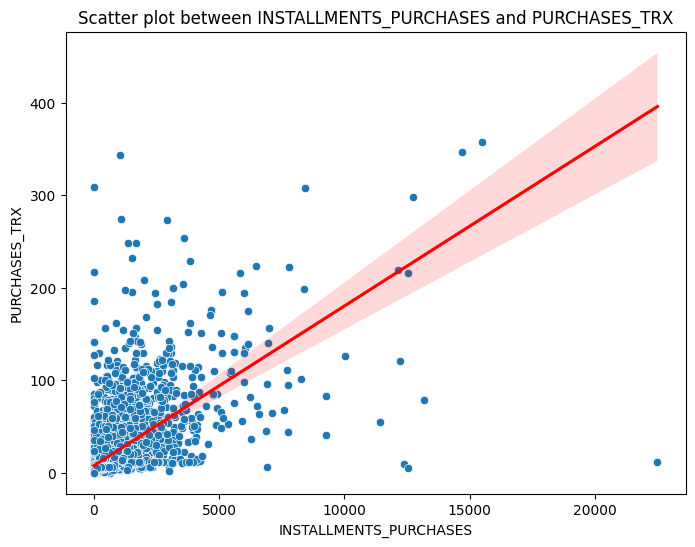

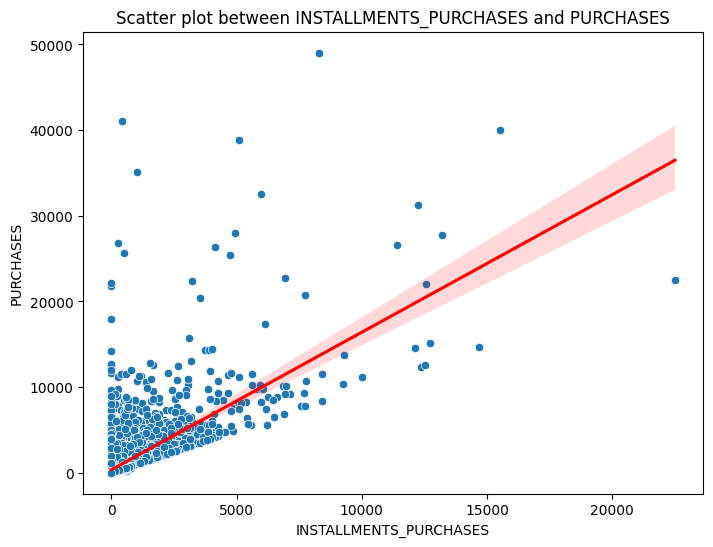

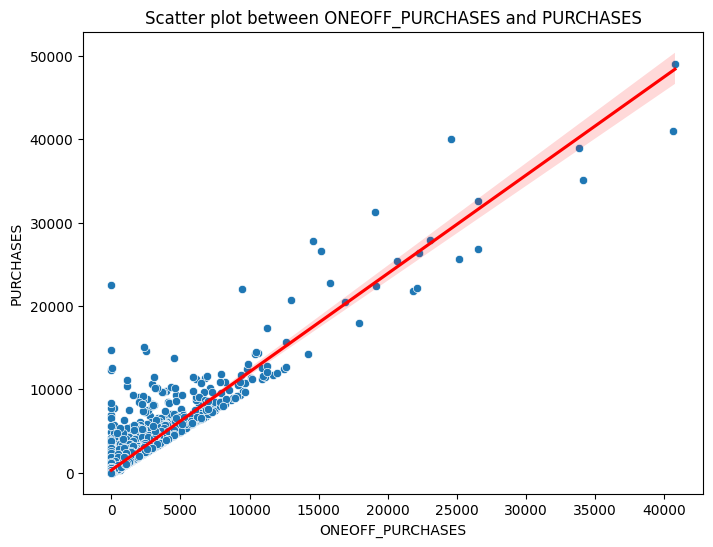

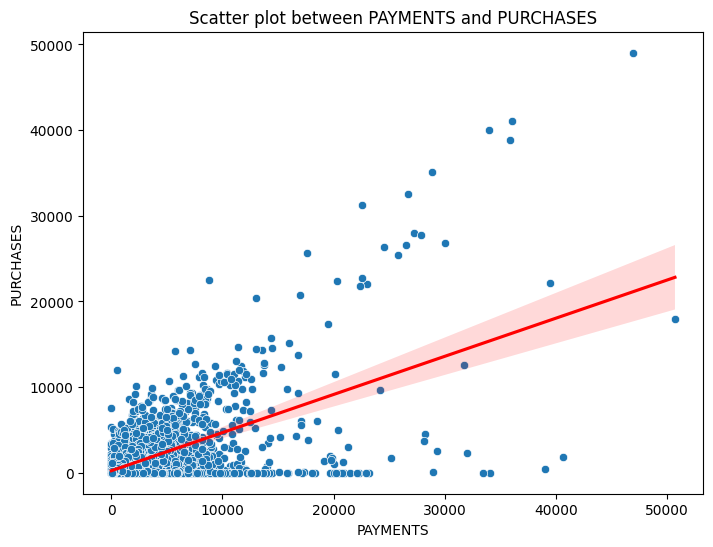

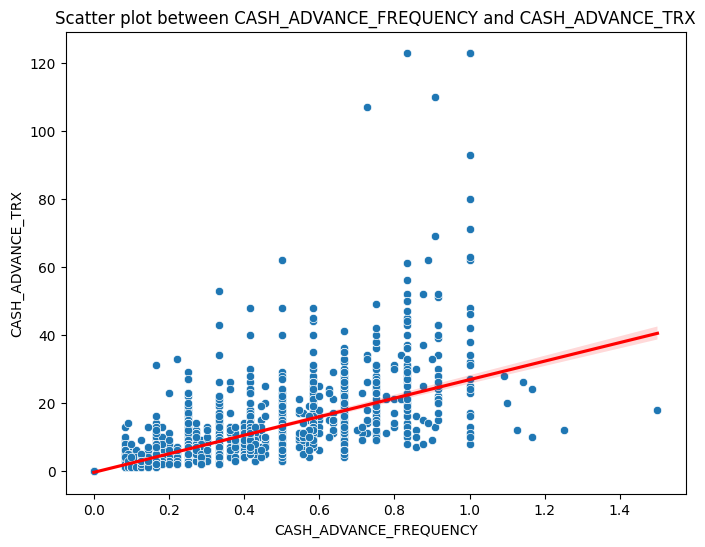

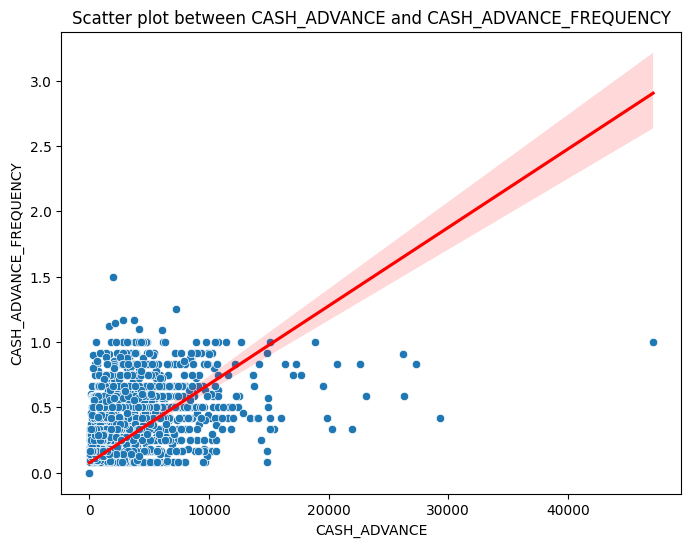

In [83]:
for pair in key_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
    sns.regplot(x=df[pair[0]], y=df[pair[1]], scatter=False, color='red')
    plt.title(f'Scatter plot between {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

### Summary
#### Purchases frequency vs purchases installment frequency
The correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENTS_FREQUENCY' is 0.86. This means that the frequency of purchases is highly correlated with the frequency of purchases in installments. This is expected because if a customer makes purchases frequently, they are more likely to make purchases in installments.

#### Cash advance frequency vs cash advance transactions frequency
The correlation between 'CASH_ADVANCE_FREQUENCY' and 'CASH_ADVANCE_TRX' is 0.8. This means that the frequency of cash advances is highly correlated with the number of transactions made with cash in advance. This is expected because if a customer makes cash advances frequently, they are more likely to make more transactions with cash in advance.

#### Purchases vs purchases transactions
The correlation between 'PURCHASES' and 'PURCHASES_TRX' is 0.69. This means that the amount spent on purchases is highly correlated with the number of purchase transactions made. This is expected because if a customer spends more on purchases, they are more likely to make more purchase transactions.

#### Installments purchases vs purchases transactions
The correlation between 'INSTALLMENTS_PURCHASES' and 'PURCHASES_TRX' is 0.63. This means that the amount spent on purchases in installments is highly correlated with the number of purchase transactions made. This is expected because if a customer spends more on purchases in installments, they are more likely to make more purchase transactions.

#### Installments purchases vs purchases
The correlation between 'INSTALLMENTS_PURCHASES' and 'PURCHASES' is 0.68. This means that the amount spent on purchases in installments is highly correlated with the total amount spent on purchases. This is expected because if a customer spends more on purchases in installments, they are more likely to spend more on purchases in general.

#### One-off purchases vs purchases
The correlation between 'ONEOFF_PURCHASES' and 'PURCHASES' is 0.92. This means that the amount spent on one-off purchases is highly correlated with the total amount spent on purchases. This is expected because if a customer spends more on one-off purchases, they are more likely to spend more on purchases in general.

#### Payments vs purchases
The correlation between 'PAYMENTS' and 'PURCHASES' is 0.6. This means that the amount paid by the customer is highly correlated with the total amount spent on purchases. This is expected because if a customer spends more on purchases, they are more likely to pay more.

#### Cash advance frequency vs cash advance transactions
The correlation between 'CASH_ADVANCE_FREQUENCY' and 'CASH_ADVANCE_TRX' is 0.8. This means that the frequency of cash advances is highly correlated with the number of transactions made with cash in advance. This is expected because if a customer makes cash advances frequently, they are more likely to make more transactions with cash in advance.

#### Cash advance vs cash advance frequency
The correlation between 'CASH_ADVANCE' and 'CASH_ADVANCE_FREQUENCY' is 0.63. This means that the amount of cash advances is moderately correlated with the frequency of cash advances. This is expected because if a customer makes cash advances frequently, they are more likely to make more cash advances.

# Clustering
### Preprocessing

In [90]:
# Drop the CUST_ID column
df.drop('CUST_ID', axis=1, inplace=True)

# Set missing values in numerical columns to the median
df.fillna(df.median(), inplace=True)

# Use Min_max scaling to normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) # exclude non-numeric columns

### Optimal number of clusters
#### Elbow method

e:\ZSU-Projekt\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\ZSU-Projekt\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


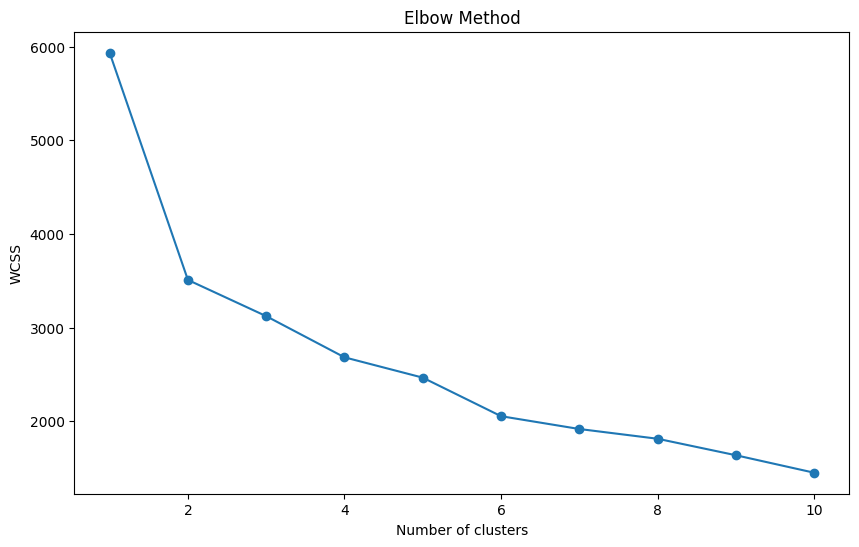

In [91]:
wcss = [] # Within-Cluster-Sum-of-Squares
for i in range(1, 11): # 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=23)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Based on the elbow method, the optimal number of clusters could be 2 or 6.

### Silhouette coefficient

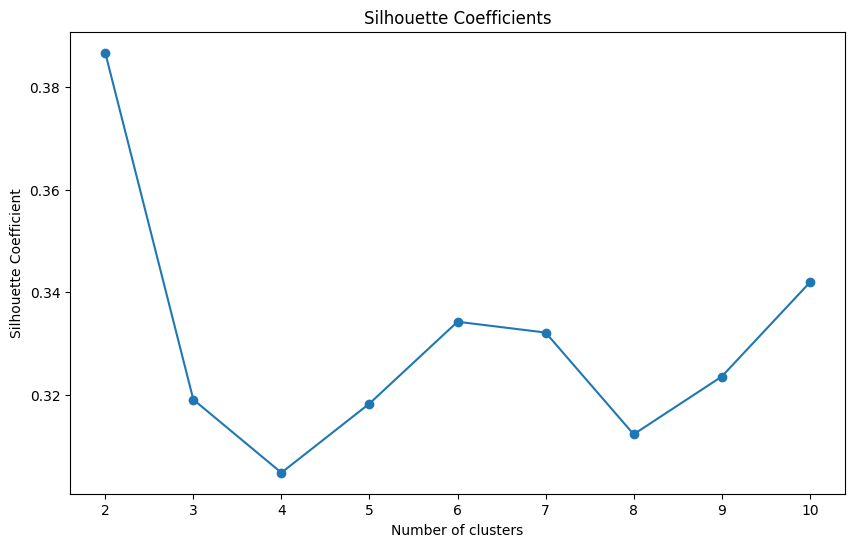

In [93]:
sil_coeffs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=23)
    labels = kmeans.fit_predict(scaled_data)
    sil_coeffs.append(silhouette_score(scaled_data, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_coeffs, marker='o')
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

#### The silhouette coefficient confirms that the optimal number of clusters could be 2 or 6.

### K-means clustering (k=6)

In [ ]:
optimal_k = 6